This is a tester notebook to look into the small nonheirarchical models I've fit for subjects 4,5, and 6.

In [11]:
import arviz as az
import numpy as np
from scipy.special import softmax

In [12]:
# starting with subject 4
trace = az.from_netcdf("./results_1state_n2000_t2000/trace_subject_4.nc")
az.summary(trace)  # Parameter estimates and diagnostics

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"base_mu[0, 0]",0.950,0.043,0.870,1.030,0.001,0.000,5729.0,5223.0,1.0
"base_mu[0, 1]",1.072,0.691,-0.200,2.378,0.008,0.006,6807.0,6151.0,1.0
"beta_game[0, 0]",-0.080,0.037,-0.148,-0.006,0.000,0.000,10199.0,5732.0,1.0
"beta_game[0, 1]",0.276,0.636,-0.883,1.487,0.006,0.006,9723.0,6183.0,1.0
"beta_time[0, 0]",0.001,0.002,-0.003,0.005,0.000,0.000,6120.0,5192.0,1.0
"beta_time[0, 1]",0.085,0.042,0.008,0.164,0.001,0.000,6697.0,6035.0,1.0
pi_logits[0],-0.010,0.982,-1.814,1.826,0.010,0.012,10349.0,5279.0,1.0
"A_logits[0, 0]",0.012,0.998,-1.769,1.963,0.010,0.012,11023.0,5807.0,1.0
"sigma[0, 0]",0.103,0.015,0.078,0.131,0.000,0.000,9833.0,5346.0,1.0
"sigma[0, 1]",2.437,0.285,1.923,2.965,0.003,0.002,9583.0,5160.0,1.0


<xarray.Dataset> Size: 200B
Dimensions:          (base_mu_dim_0: 1, base_mu_dim_1: 2, beta_game_dim_0: 1,
                      beta_game_dim_1: 2, beta_time_dim_0: 1,
                      beta_time_dim_1: 2, pi_logits_dim_0: 1,
                      A_logits_dim_0: 1, A_logits_dim_1: 1, sigma_dim_0: 1,
                      sigma_dim_1: 2)
Coordinates:
  * base_mu_dim_0    (base_mu_dim_0) int64 8B 0
  * base_mu_dim_1    (base_mu_dim_1) int64 16B 0 1
  * beta_game_dim_0  (beta_game_dim_0) int64 8B 0
  * beta_game_dim_1  (beta_game_dim_1) int64 16B 0 1
  * beta_time_dim_0  (beta_time_dim_0) int64 8B 0
  * beta_time_dim_1  (beta_time_dim_1) int64 16B 0 1
  * pi_logits_dim_0  (pi_logits_dim_0) int64 8B 0
  * A_logits_dim_0   (A_logits_dim_0) int64 8B 0
  * A_logits_dim_1   (A_logits_dim_1) int64 8B 0
  * sigma_dim_0      (sigma_dim_0) int64 8B 0
  * sigma_dim_1      (sigma_dim_1) int64 16B 0 1
Data variables:
    base_mu          (base_mu_dim_0, base_mu_dim_1) float64 16B 1.001 0.9999
    beta_game        (beta_game_dim_0, beta_game_dim_1) float64 16B 1.001 1.0
    beta_time        (beta_time_dim_0, beta_time_dim_1) float64 16B 1.001 1.0
    pi_logits        (pi_logits_dim_0) float64 8B 0.9999
    A_logits         (A_logits_dim_0, A_logits_dim_1) float64 8B 1.002
    sigma            (sigma_dim_0, sigma_dim_1) float64 16B 1.0 1.001

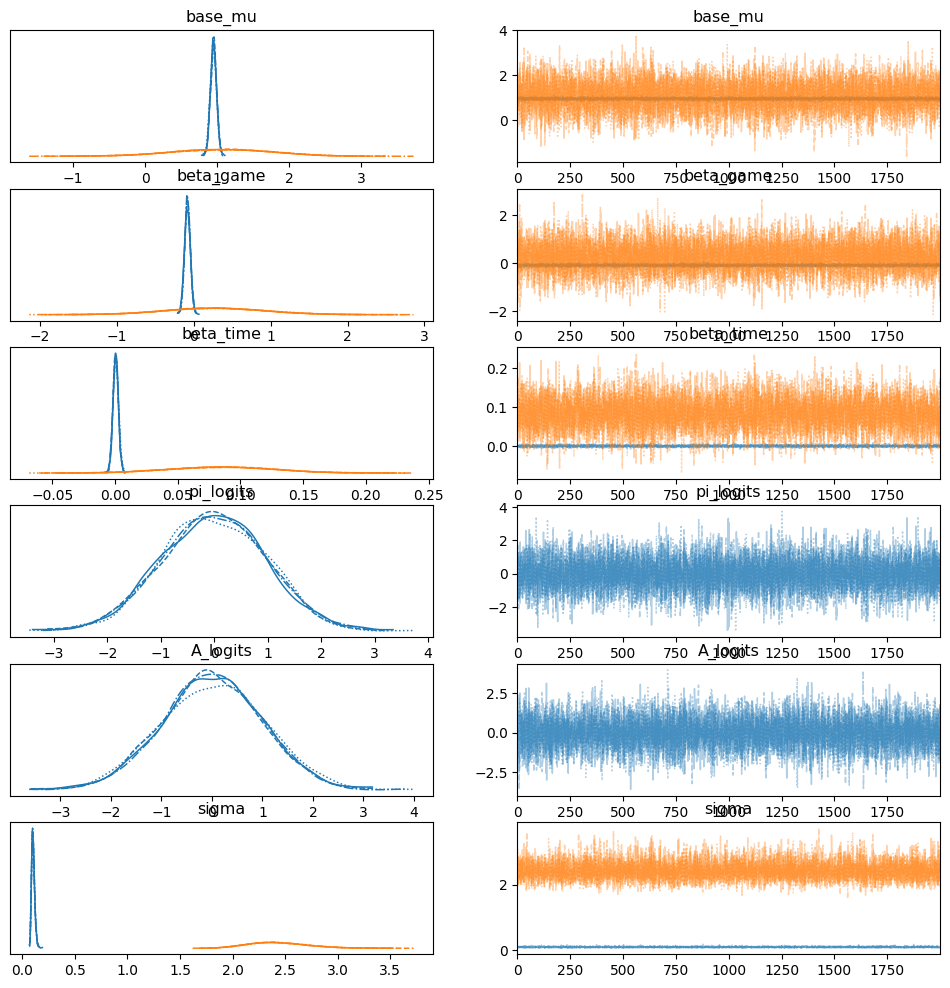

In [13]:
# check convergence:
az.plot_trace(trace)  # Visual diagnostics
az.rhat(trace)  # R-hat convergence diagnostic

In [14]:
# convert back to probabilities
pi_samples = softmax(trace.posterior.pi_logits.values)
print(f"State 1 initial probability: {pi_samples.mean()}")

State 1 initial probability: 0.000125


interpretation: most people begin in state 2

In [15]:
A_samples = softmax(trace.posterior.A_logits.values, axis=-1)
print("Transition probabilities:")
print(f"Stay in State 1: {A_samples[0,0].mean():.3f}")
print(f"Switch 1→2: {A_samples[0,1].mean():.3f}")
print(f"Switch 2→1: {A_samples[1,0].mean():.3f}") 
print(f"Stay in State 2: {A_samples[1,1].mean():.3f}")

Transition probabilities:
Stay in State 1: 1.000
Switch 1→2: 1.000
Switch 2→1: 1.000
Stay in State 2: 1.000


In [16]:
summary = az.summary(trace)
print(summary)

                  mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
base_mu[0, 0]    0.950  0.043   0.870    1.030      0.001    0.000    5729.0   
base_mu[0, 1]    1.072  0.691  -0.200    2.378      0.008    0.006    6807.0   
beta_game[0, 0] -0.080  0.037  -0.148   -0.006      0.000    0.000   10199.0   
beta_game[0, 1]  0.276  0.636  -0.883    1.487      0.006    0.006    9723.0   
beta_time[0, 0]  0.001  0.002  -0.003    0.005      0.000    0.000    6120.0   
beta_time[0, 1]  0.085  0.042   0.008    0.164      0.001    0.000    6697.0   
pi_logits[0]    -0.010  0.982  -1.814    1.826      0.010    0.012   10349.0   
A_logits[0, 0]   0.012  0.998  -1.769    1.963      0.010    0.012   11023.0   
sigma[0, 0]      0.103  0.015   0.078    0.131      0.000    0.000    9833.0   
sigma[0, 1]      2.437  0.285   1.923    2.965      0.003    0.002    9583.0   

                 ess_tail  r_hat  
base_mu[0, 0]      5223.0    1.0  
base_mu[0, 1]      6151.0    1.0  
beta_game[0, 0

interpretation: state 0 (low accuracy, not much rest), state 1 (high accuracy, larger amount of rest)

In [7]:
# More explicit indexing
state0_acc = trace.posterior.base_mu.isel(base_mu_dim_0=0, base_mu_dim_1=0)  # State 0, Variable 0 (accuracy)
state1_acc = trace.posterior.base_mu.isel(base_mu_dim_0=1, base_mu_dim_1=0)  # State 1, Variable 0 (accuracy)
state0_rest = trace.posterior.base_mu.isel(base_mu_dim_0=0, base_mu_dim_1=1) # State 0, Variable 1 (rest)
state1_rest = trace.posterior.base_mu.isel(base_mu_dim_0=1, base_mu_dim_1=1) # State 1, Variable 1 (rest)

print(f"State 0 accuracy: {state0_acc.mean():.3f}")
print(f"State 1 accuracy: {state1_acc.mean():.3f}")
print(f"State 0 rest duration: {state0_rest.mean():.3f}")
print(f"State 1 rest duration: {state1_rest.mean():.3f}")

State 0 accuracy: 0.937
State 1 accuracy: 0.979
State 0 rest duration: 1.348
State 1 rest duration: 1.856


In [8]:
# Diagonal of transition matrix
stability = A_samples.diagonal(axis1=-2, axis2=-1).mean(axis=(0,1))
print(f"Average state stability: {stability}")

print(f"Average time spent in State 0: {1/(1-stability[0]):.1f} trials")
print(f"Average time spent in State 1: {1/(1-stability[1]):.1f} trials")

Average state stability: [0.53978845 0.30801428]
Average time spent in State 0: 2.2 trials
Average time spent in State 1: 1.4 trials


interpretation: state 1 is more persistent

In [9]:
# Time effects on ACCURACY for each state
time_effect_acc_state0 = trace.posterior.beta_time.sel(beta_time_dim_0=0, beta_time_dim_1=0)  # State 0, Accuracy
time_effect_acc_state1 = trace.posterior.beta_time.sel(beta_time_dim_0=1, beta_time_dim_1=0)  # State 1, Accuracy

# Time effects on REST DURATION for each state  
time_effect_rest_state0 = trace.posterior.beta_time.sel(beta_time_dim_0=0, beta_time_dim_1=1)  # State 0, Rest
time_effect_rest_state1 = trace.posterior.beta_time.sel(beta_time_dim_0=1, beta_time_dim_1=1)  # State 1, Rest

print(f"Time effect on accuracy - State 0: {time_effect_acc_state0.mean():.3f}")
print(f"Time effect on accuracy - State 1: {time_effect_acc_state1.mean():.3f}")
print(f"Time effect on rest - State 0: {time_effect_rest_state0.mean():.3f}")
print(f"Time effect on rest - State 1: {time_effect_rest_state1.mean():.3f}")

Time effect on accuracy - State 0: 0.001
Time effect on accuracy - State 1: -0.000
Time effect on rest - State 0: 0.078
Time effect on rest - State 1: 0.205


In [17]:
def check_model_health(trace):
    # 1. Convergence
    rhat_values = az.rhat(trace).max()
    ess_values = az.ess(trace).min()

    rhat_max = float(rhat_values.to_array().max().values)
    ess_min = float(ess_values.to_array().min().values)
    
    print("=== CONVERGENCE ===")
    print(f"Max R-hat: {rhat_max} (want < 1.1)") # how much agreement there is between chains (higher rhat less agreement)
    print(f"Min ESS: {ess_min} (want > 100)") # ESS = num independent samples (ther emight be more but this is how much info they got)
    
    # 2. States are different
    base_mu = trace.posterior.base_mu.mean(dim=['chain', 'draw'])
    state_diff = abs(base_mu[0] - base_mu[1]).values
    
    print("\n=== STATE DIFFERENCES ===")
    print(f"Accuracy difference: {state_diff[0]}")
    print(f"Rest difference: {state_diff[1]}")
    
    # 3. Transition matrix
    A_logits = trace.posterior.A_logits.mean(dim=['chain', 'draw'])
    A = softmax(A_logits.values, axis=-1)
    
    print("\n=== TRANSITION MATRIX ===")
    print(f"Stay in State 0: {A[0,0]}")
    print(f"Stay in State 1: {A[1,1]}")
    
    # Overall assessment
    print("\n=== ASSESSMENT ===")
    print(rhat_max)
    print(ess_min)
    if rhat_max < 1.1 and ess_min > 100:
        print("Convergence looks good")
    else:
        print("Big convergence issues")
        
    if min(state_diff) > 0.05:
        print("States are distinct")
    else:
        print("States might not be distinct")

# Run the check
check_model_health(trace)

=== CONVERGENCE ===
Max R-hat: 1.0023161284167708 (want < 1.1)
Min ESS: 5728.95592049166 (want > 100)


IndexError: index 1 is out of bounds for axis 0 with size 1